# Imports

In [ ]:
pip install tsai

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB

In [ ]:
import time
import json
import os



import pandas as pd
import numpy as np


import torch
print(torch.__version__)  # Should print a compatible version
print(torch.cuda.is_available())

import tsai
from tsai.basics import*



import matplotlib.pyplot as plt
%matplotlib inline



2.2.2+cu121
False


In [ ]:
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("PyTorch version:", torch.__version__)

NumPy version: 1.26.4
Pandas version: 2.2.2
PyTorch version: 2.2.2+cu121


In [ ]:
import tsai
print(tsai.__version__)


0.3.9


In [ ]:
my_setup

<function tsai.imports.my_setup(*pkgs)>

In [ ]:
os.getcwd()

'/content'

In [ ]:
master_df = pd.read_csv("/content/Time-Series Data.csv")

# Data Cleaning and Preprocessing

In [ ]:
master_df

,Date,S&P 500,Interest Rate,VIX,OVX,USO,DXY,Crude Oil
0,01/01/21,NaN,0.09,NaN,NaN,NaN,89.94,NaN
1,02/01/21,NaN,0.09,NaN,NaN,NaN,NaN,NaN
2,03/01/21,NaN,0.09,NaN,NaN,NaN,NaN,NaN
3,04/01/21,3700.65,0.09,26.97,42.12,32.38,89.87,47.47
4,05/01/21,3726.86,0.09,25.34,40.39,33.94,89.44,49.78
...,...,...,...,...,...,...,...,...
1396,28/10/24,5823.52,NaN,NaN,42.96,70.43,104.32,67.65
1397,29/10/24,5832.92,NaN,NaN,42.47,69.66,104.32,NaN
1398,30/10/24,5813.67,NaN,NaN,41.13,71.36,103.99,NaN
1399,31/10/24,5705.45,NaN,NaN,48.79,73.08,103.98,NaN


In [ ]:
master_df.columns = ['date', 's_p_500', 'interest_rate', 'vix', 'ovx', 'uso', 'dxy', 'crude']

In [ ]:
df_crude = master_df[['date','crude']]

In [ ]:
df_crude

,date,crude
0,01/01/21,NaN
1,02/01/21,NaN
2,03/01/21,NaN
3,04/01/21,47.47
4,05/01/21,49.78
...,...,...
1396,28/10/24,67.65
1397,29/10/24,NaN
1398,30/10/24,NaN
1399,31/10/24,NaN


In [ ]:
df_crude['crude_fixed'] = df_crude['crude'].fillna(method='ffill')


SettingWithCopyError: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [ ]:
df_crude = df_crude.iloc[3:]
df_crude.reset_index(drop = True, inplace = True)

In [ ]:
df_crude

,date,crude,crude_fixed
0,04/01/21,47.47,47.47
1,05/01/21,49.78,49.78
2,06/01/21,50.45,50.45
3,07/01/21,50.63,50.63
4,08/01/21,52.14,52.14
...,...,...,...
1393,28/10/24,67.65,67.65
1394,29/10/24,NaN,67.65
1395,30/10/24,NaN,67.65
1396,31/10/24,NaN,67.65


In [ ]:
zero_counts = (df_crude['crude_fixed'] == 0).sum()
print(zero_counts)


34


In [ ]:
df_crude['crude_fixed'] = df_crude['crude_fixed'].replace(0).fillna(method='ffill')


SettingWithCopyError: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [ ]:
zero_counts = (df_crude['crude_fixed'] == 0).sum()
print(zero_counts)


0


In [ ]:
df_crude['date'] = pd.to_datetime(df_crude['date'], format='%d/%m/%y') #important as not doing this will lead to issues with tsai splits

SettingWithCopyError: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [ ]:
crude_modeling_df = df_crude[['date', 'crude_fixed']]
crude_modeling_df.columns = ['date', 'crude']

crude_modeling_df

,date,crude
0,2021-01-04,47.47
1,2021-01-05,49.78
2,2021-01-06,50.45
3,2021-01-07,50.63
4,2021-01-08,52.14
...,...,...
1393,2024-10-28,67.65
1394,2024-10-29,67.65
1395,2024-10-30,67.65
1396,2024-10-31,67.65


# EDA

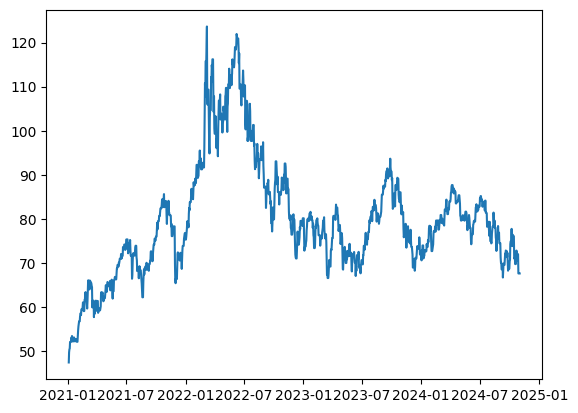

In [ ]:
plt.plot(df_crude['date'], df_crude['crude_fixed'])

# Modeling

## Splits

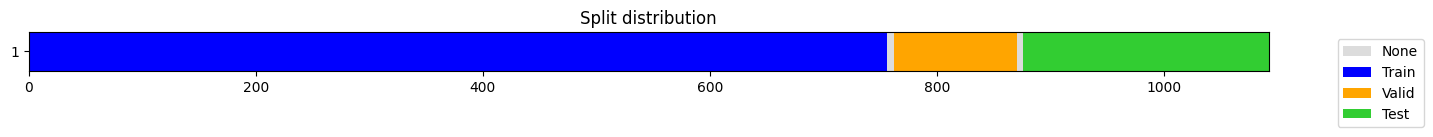

((#756) [0,1,2,3,4,5,6,7,8,9...],
 (#108) [762,763,764,765,766,767,768,769,770,771...],
 (#216) [876,877,878,879,880,881,882,883,884,885...])

In [ ]:
datetime_col = 'date'
fcst_history = 300 # # steps in the past
fcst_horizon = 7  # # steps in the future
valid_size   = 0.1  # int or float indicating the size of the training set
test_size    = 0.2  # int or float indicating the size of the test set

splits = get_forecasting_splits(crude_modeling_df, fcst_history=fcst_history, fcst_horizon=fcst_horizon, datetime_col=datetime_col,
                                valid_size=valid_size, test_size=test_size)
splits


In [ ]:
train_data = crude_modeling_df.iloc[splits[0]]
test_data = crude_modeling_df.iloc[splits[2]]
val_data = crude_modeling_df.iloc[splits[1]]

In [ ]:
train_data

,date,crude
0,2021-01-04,47.47
1,2021-01-05,49.78
2,2021-01-06,50.45
3,2021-01-07,50.63
4,2021-01-08,52.14
...,...,...
751,2023-01-25,79.78
752,2023-01-26,80.64
753,2023-01-27,79.73
754,2023-01-28,79.73


## Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_crude_modeling_df = crude_modeling_df.copy()

In [ ]:
scaler.fit(train_data[['crude']])
scaled_crude_modeling_df['crude'] = scaler.transform(crude_modeling_df[['crude']])

In [ ]:
scaled_crude_modeling_df

,date,crude
0,2021-01-04,-2.022768
1,2021-01-05,-1.885458
2,2021-01-06,-1.845633
3,2021-01-07,-1.834933
4,2021-01-08,-1.745177
...,...,...
1393,2024-10-28,-0.823240
1394,2024-10-29,-0.823240
1395,2024-10-30,-0.823240
1396,2024-10-31,-0.823240


In [ ]:
scaled_train_data = scaled_crude_modeling_df.iloc[splits[0]]
scaled_test_data = scaled_crude_modeling_df.iloc[splits[2]]
scaled_val_data = scaled_crude_modeling_df.iloc[splits[1]]

## Sliding Window

In [ ]:
x_vars = 'crude'
y_vars = 'crude'


In [ ]:
x, y = prepare_forecasting_data(scaled_crude_modeling_df, fcst_history=fcst_history, fcst_horizon=fcst_horizon, x_vars=x_vars, y_vars=y_vars)
x.shape, y.shape

((1092, 1, 300), (1092, 1, 7))

In [ ]:
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)  # or dtype=torch.int64 for classi


In [ ]:
x_tensor.dtype

torch.float32

In [ ]:
# Convert each fastcore foundation list to a standard Python list
splits = [list(split) for split in splits]
splits = [np.array(split, dtype=np.int32) for split in splits]

## Model Building

In [ ]:
arch_config = dict(
    n_layers=3,  # number of encoder layers
    n_heads=4,  # number of heads
    d_model=16,  # dimension of model
    d_ff=128,  # dimension of fully connected network
    attn_dropout=0.1, # dropout applied to the attention weights
    dropout=0.3,  # dropout applied to all linear layers in the encoder except q,k&v projections
    patch_len=7,  # length of the patch applied to the time series to create patches
    stride=1,  # stride used when creating patches
    padding_patch=True,  # padding_patch
)


In [ ]:
learn = TSForecaster(x_tensor, y_tensor, splits = splits, batch_size=64,
                     arch="PatchTST", arch_config=arch_config, metrics=[mse, mae], cbs=ShowGraph())

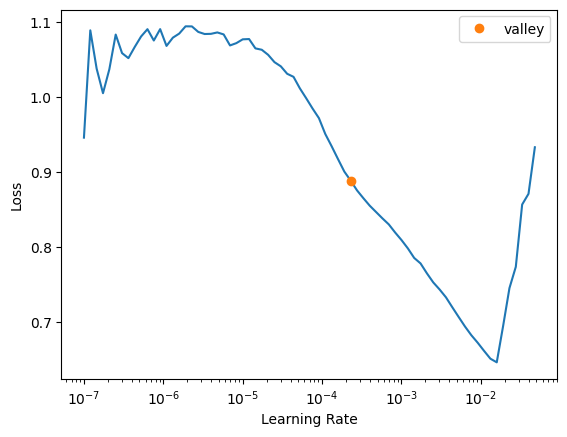

In [ ]:
lr_max = learn.lr_find().valley

epoch,train_loss,valid_loss,mse,mae,time
0,0.932319,0.135133,0.135133,0.310490,00:36
1,0.680628,0.292961,0.292961,0.473986,00:35
2,0.526430,0.260021,0.260021,0.448679,00:35
3,0.426812,0.149669,0.149669,0.336884,00:36
4,0.357175,0.128265,0.128265,0.307530,00:36
5,0.308249,0.121430,0.121430,0.297432,00:35
6,0.271381,0.099899,0.099899,0.264733,00:36
7,0.244371,0.097044,0.097044,0.260829,00:35
8,0.224911,0.093974,0.093974,0.255294,00:36
9,0.209208,0.092879,0.092879,0.253572,00:35


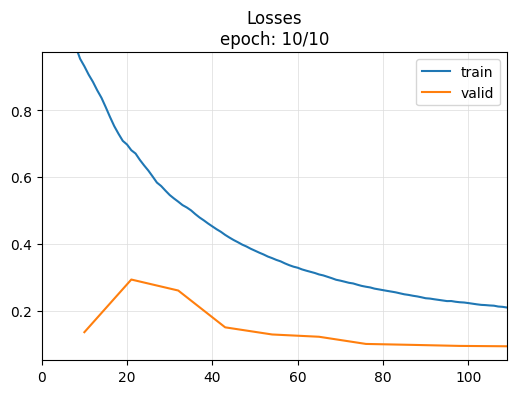

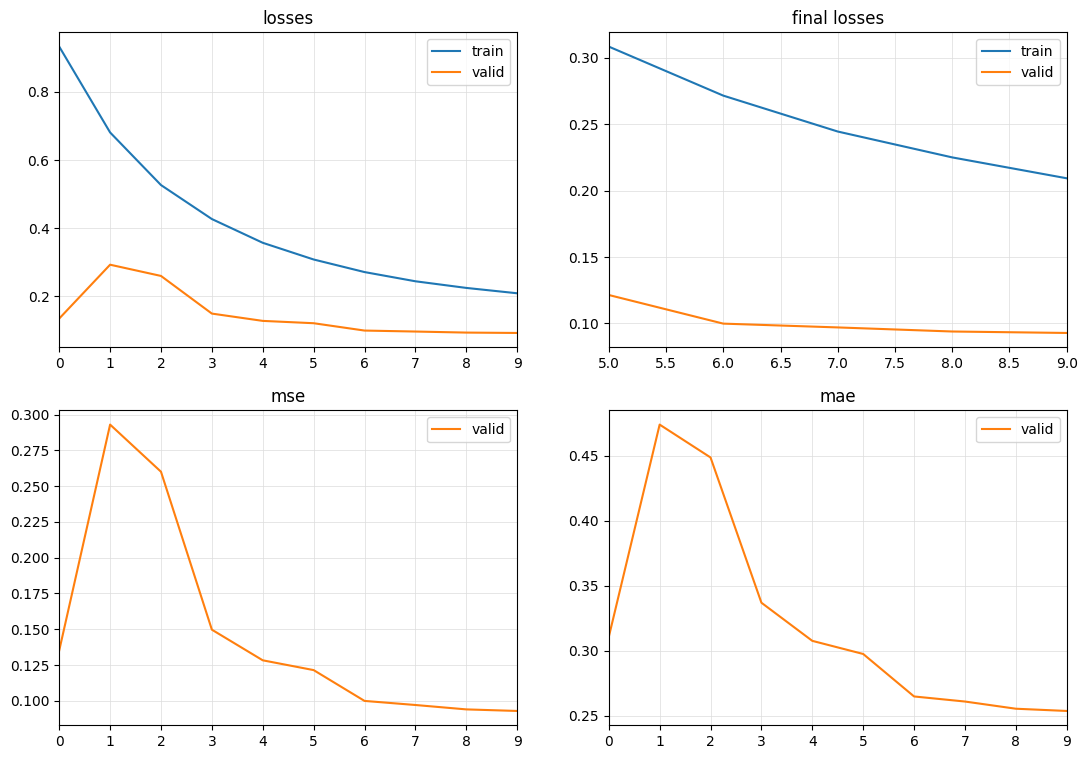

In [ ]:
n_epochs = 10
learn.fit_one_cycle(n_epochs, lr_max =lr_max)
learn.export('patchTST.pt')

In [ ]:
learn.export('patchTST.pt')

# Model Validation

In [ ]:
from tsai.inference import load_learner
from sklearn.metrics import mean_squared_error, mean_absolute_error

learn = load_learner('/content/patchTST.pt')
scaled_preds, *_ = learn.get_X_preds(x[splits[1]])
scaled_preds = to_np(scaled_preds)
print(f"scaled_preds.shape: {scaled_preds.shape}")

scaled_y_true = y[splits[1]]
results_df = pd.DataFrame(columns=["mse", "mae"])
results_df.loc["valid", "mse"] = mean_squared_error(scaled_y_true.flatten(), scaled_preds.flatten())
results_df.loc["valid", "mae"] = mean_absolute_error(scaled_y_true.flatten(), scaled_preds.flatten())
results_df


scaled_preds.shape: (108, 1, 7)


,mse,mae
valid,0.092879,0.253572


In [ ]:
learn = load_learner('/content/patchTST.pt')
y_test_preds, *_ = learn.get_X_preds(x[splits[2]])
y_test_preds = to_np(y_test_preds)
print(f"y_test_preds.shape: {y_test_preds.shape}")

y_test = y[splits[2]]
results_df = pd.DataFrame(columns=["mse", "mae"])
results_df.loc["test", "mse"] = mean_squared_error(y_test.flatten(), y_test_preds.flatten())
results_df.loc["test", "mae"] = mean_absolute_error(y_test.flatten(), y_test_preds.flatten())
results_df

y_test_preds.shape: (216, 1, 7)


,mse,mae
test,0.066873,0.211754


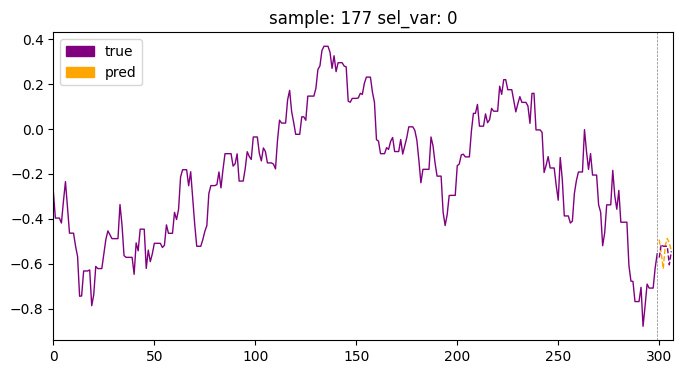

In [ ]:
x_test = x[splits[2]]
y_test = y[splits[2]]
plot_forecast(x_test, y_test, y_test_preds, sel_vars = True)


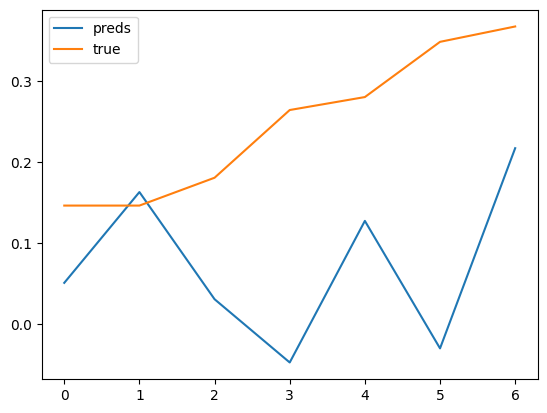

In [ ]:
plt.plot(y_test_preds[5][0], label = 'preds')
plt.plot(y_test[5][0], label = 'true')
plt.legend()

In [ ]:
y_preds_tensor = torch.tensor(y_test_preds)


y_test = y[splits[2]]
y_test_tensor = torch.tensor(y_test)

In [ ]:
y_test_tensor.shape


torch.Size([216, 1, 7])

In [ ]:
append_preds = y_preds_tensor[-1, 0, 1:]
append_preds

append_true = y_test_tensor[-1, 0, 1:]


In [ ]:
first_preds = y_preds_tensor[:, 0, 0]

first_true = y_test_tensor[:, 0, 0]

first_preds_with_final = torch.cat((first_preds, append_preds))

first_true_with_final = torch.cat((first_true, append_true))


tensor([-0.2677, -0.2620, -0.2926, -0.3042, -0.2260, -0.1669, -0.1804, -0.2055,
        -0.1774, -0.1558, -0.1177, -0.1656, -0.1649, -0.1960, -0.2043, -0.2015,
        -0.2297, -0.2067, -0.2691, -0.2400, -0.1709, -0.1114, -0.0758, -0.1054,
        -0.1473, -0.1578, -0.1442, -0.1084, -0.1475, -0.1745, -0.1721, -0.1577,
        -0.1478, -0.1629, -0.1801, -0.1567, -0.0433,  0.0295,  0.0511,  0.0692,
         0.0687,  0.0954,  0.1162,  0.1505,  0.1593,  0.2127,  0.1885,  0.1715,
         0.2352,  0.1938,  0.1524,  0.1531,  0.1519,  0.1703,  0.1996,  0.2162,
         0.1850,  0.2715,  0.2503,  0.2377,  0.2730,  0.2433,  0.2585,  0.2590,
         0.1575,  0.1161,  0.0974,  0.1231,  0.1425,  0.1335,  0.0978,  0.0687,
         0.1208,  0.0899,  0.1139,  0.0738,  0.0166,  0.0056,  0.0257,  0.0419,
         0.0249,  0.0271, -0.0085,  0.0249,  0.0678,  0.0790,  0.0232,  0.0174,
        -0.0632, -0.0100, -0.0490, -0.0896, -0.0703, -0.0686, -0.0755, -0.0815,
        -0.0304, -0.0741, -0.0592, -0.09

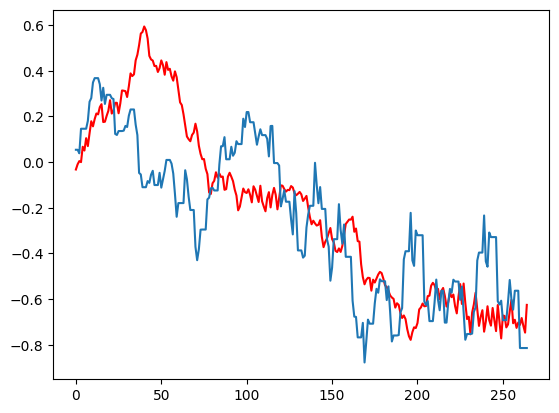

In [ ]:
plt.plot(first_preds_with_final, c = 'r')
plt.plot(first_true_with_final)

In [ ]:
splits[0][-1]

755

In [ ]:
splits[1][0]

762

In [ ]:
splits[1][-1]

869

In [ ]:
splits[2][0]

876

In [ ]:
#all sample predictions are valid and independent. Give 250 it gives the next 50.

#can access these to see how the model is doing over the next horizon

#however if you take the first from each, there will be a lag. if you input 250 the model outputs the next 50 you take first

#but when you input the next 250, it contains the true value for what you predicted, the model hence, predicts from
#true value and hence, if i take the first from each, it does not make any sense.

